# **Linear Regression**

### **Importing Libraries**

In [1]:
# Data Analysis Library

import numpy as np
import pandas as pd

In [2]:
# Libraries to plot graph

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
# Libraries for implementation and prediction of algo

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

### **About Dataset**

In [4]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### **Data Visulization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


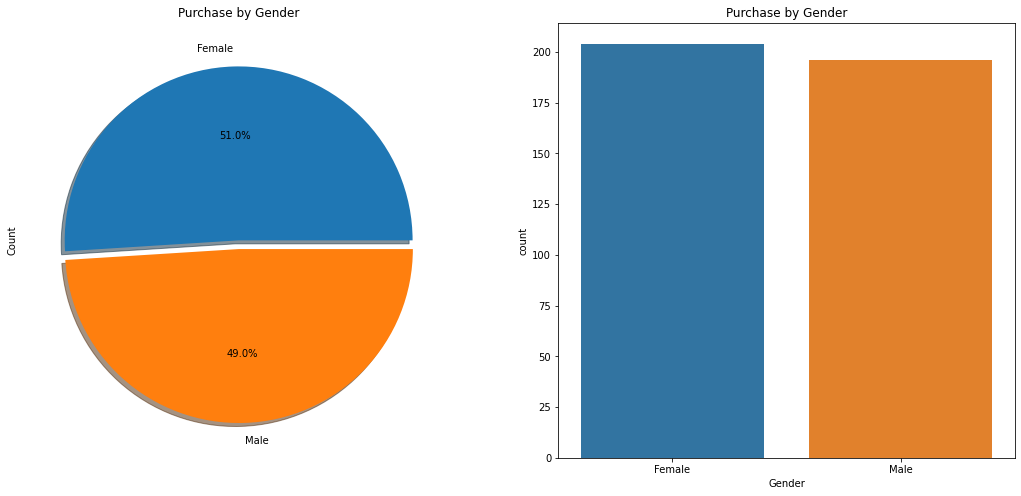

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase by Gender')
ax[0].set_ylabel('Count')
sns.countplot('Gender',data=df,ax=ax[1],order=df['Gender'].value_counts().index)
ax[1].set_title('Purchase by Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


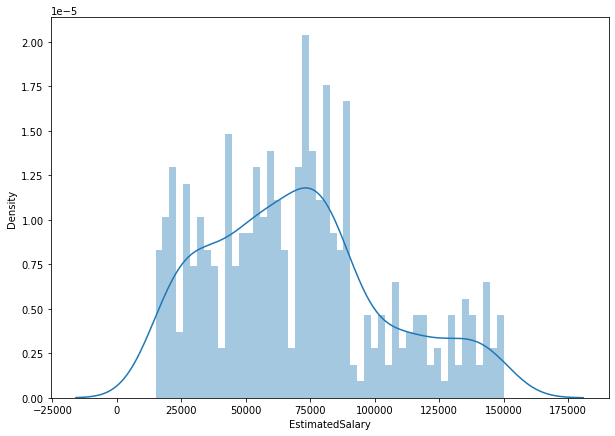

In [8]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.distplot(df['EstimatedSalary'],kde=True,bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


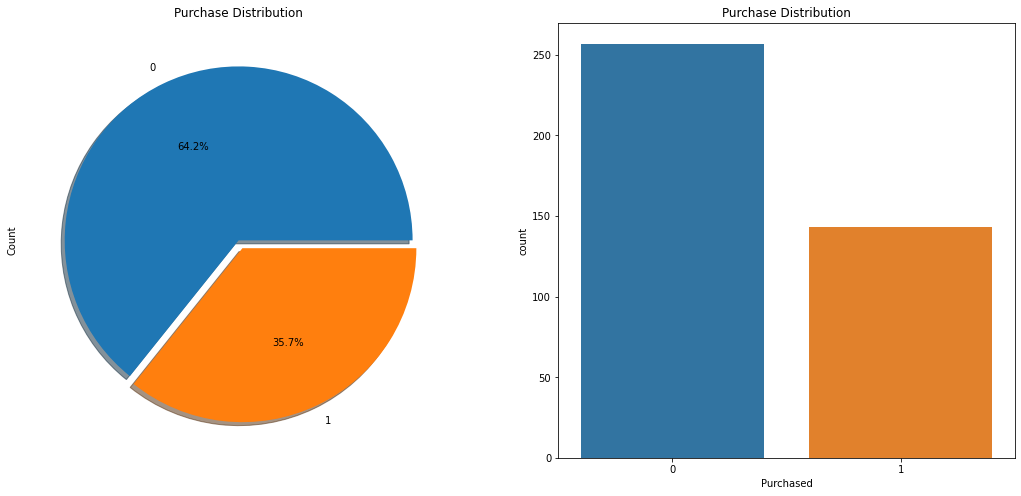

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Purchased'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Purchased',data=df,ax=ax[1],order=df['Purchased'].value_counts().index)
ax[1].set_title('Purchase Distribution')
plt.show()

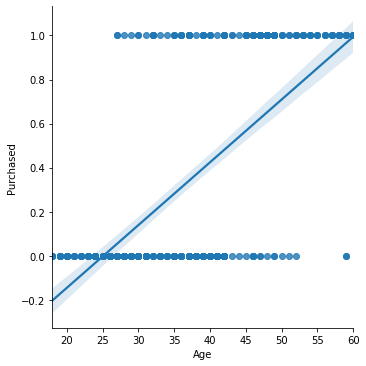

In [10]:
sns.lmplot(x='Age',y ='Purchased', data=df)

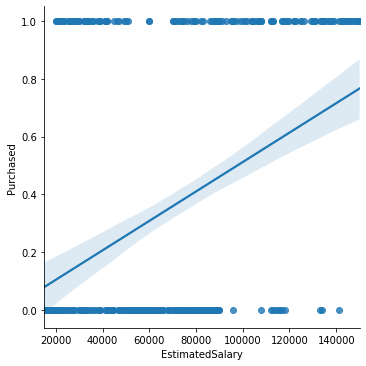

In [11]:
sns.lmplot(x='EstimatedSalary',y ='Purchased', data=df)

Text(0.5, 0, 'Purchased')

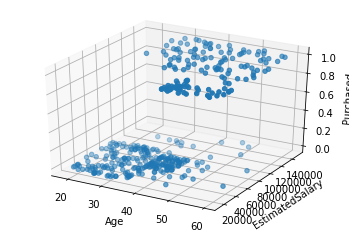

In [12]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 400)
zdata = 1 * np.random.random(400)
ax.scatter3D(df['Age'], df['EstimatedSalary'], df['Purchased'],cmap = 'Blues')
ax.set_xlabel('Age', fontsize= 10)
ax.set_ylabel("EstimatedSalary", fontsize=10)
ax.set_zlabel("Purchased", fontsize=10)

### **Corelation Between Features**

In [13]:
df_corr = df.corr() 

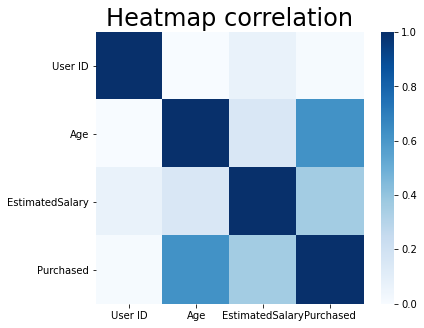

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(df_corr, cmap='Blues') 
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### **Spliting Data Into Train and Test Sets**

In [15]:
df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
X_df = df.drop([0, 1, 4], axis = 1)
Y_df = df[4]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.33, random_state=42)

### **Feature Scaling**

In [18]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Training Model**

##### **Model Instance**

In [19]:
model = LogisticRegression(fit_intercept = True, class_weight= {1:0.6, 0:0.4})

##### **Fitting Data in Model**

In [20]:
model = model.fit(X_train, Y_train)

###### **Calculating Intercept and Coefficients**

In [21]:
print("Intercept:", model.intercept_)

Intercept: [-0.72852187]


In [22]:
print("Coefficients:", model.coef_)

Coefficients: [[1.80106664 1.0677732 ]]


### **Model Prediction**

In [23]:
train_pred = model.predict(X_train)

In [24]:
pred = model.predict(X_test)

### **Model Evaluation For Training Data**

##### **Confusion Matrix**

In [25]:
cm = confusion_matrix(Y_train, train_pred.round())
print(cm)

[[156  21]
 [ 24  67]]


##### **Accuracy**

In [26]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Train Accuracy:", accuracy)

Train Accuracy: 0.832089552238806


##### **Calculating Error**

In [27]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_train, train_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_train, train_pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_train, train_pred)))

Mean Absolute Error: 0.16791044776119404
Mean Squared Error: 0.16791044776119404
Root Mean Square Error: 0.4097687735311148


##### **Precision, Recall, F1 Score**

In [28]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)

Precision: 0.8813559322033898
Recall: 0.8666666666666667
F-Score: 0.8739495798319328


##### **Ploting Graph**

Text(0, 0.5, 'Train Predicted Y')

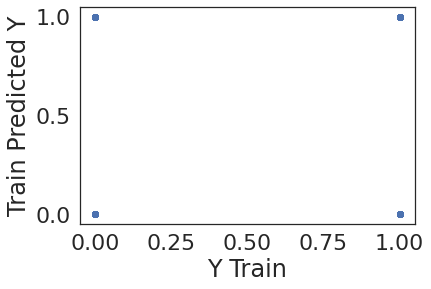

In [29]:
plt.scatter(Y_train,train_pred)
plt.xlabel('Y Train')
plt.ylabel('Train Predicted Y')

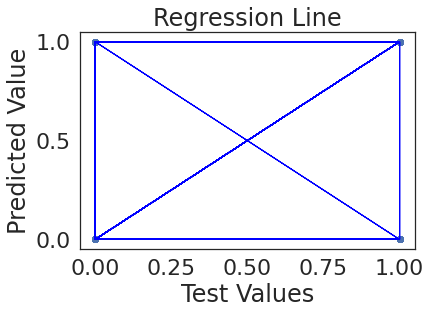

In [30]:
plt.title("Regression Line")
plt.xlabel("Test Values")
plt.ylabel("Predicted Value")
plt.plot(Y_train, train_pred, color='blue', linewidth=1)
plt.scatter(Y_train,train_pred)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


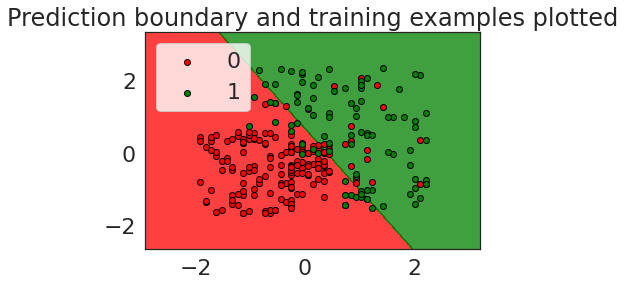

In [31]:
plt.figure(1)

X_set, Y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j, linewidths = 1, edgecolor = 'black')

plt.title('Prediction boundary and training examples plotted')
plt.legend()
plt.show()

### **Model Evaluation For Testing Data**

##### **Confusion Matrix**

In [32]:
cm = confusion_matrix(Y_test, pred.round())
print(cm)

[[76  4]
 [16 36]]


##### **Accuracy**

In [33]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8484848484848485


##### **Calculating Error**

In [34]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.15151515151515152
Mean Squared Error: 0.15151515151515152
Root Mean Square Error: 0.3892494720807615


##### **Precision, Recall, F1 Score**

In [35]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)

Precision: 0.95
Recall: 0.8260869565217391
F-Score: 0.8837209302325582


##### **Ploting Graph**

Text(0, 0.5, 'Predicted Y')

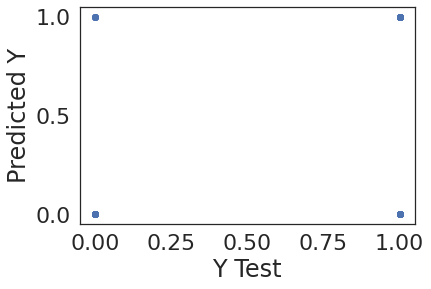

In [36]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

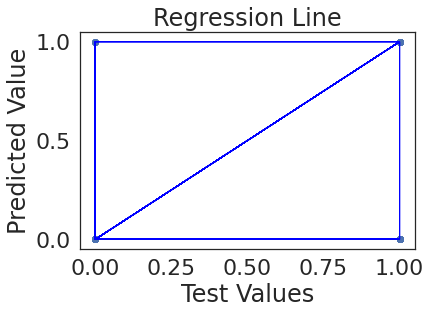

In [37]:
plt.title("Regression Line")
plt.xlabel("Test Values")
plt.ylabel("Predicted Value")
plt.plot(Y_test, pred, color='blue', linewidth=1)
plt.scatter(Y_test,pred)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


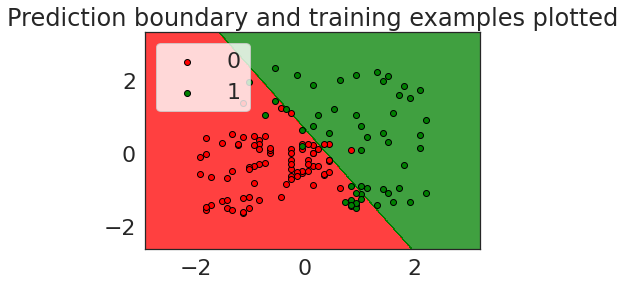

In [38]:
plt.figure(2)

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j, linewidths = 1, edgecolor = 'black')

plt.title('Prediction boundary and training examples plotted')
plt.legend()
plt.show()